In [1]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import patsy

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

In [2]:
#Read in the data
tweets = pd.read_excel("/Users/Mags/Desktop/DATA SCIENCE/Retweets/tweets.xlsx")

### EDA

In [3]:
#Looking at the top of the df
tweets.head()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
0,Tue Dec 20 10:57:00 +0000 2016,811163485052817408,RT @BeachyMaldives: Local interaction is a gre...,True,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaN,1,0,"Maldives, vacation, travel",NaN,NaN,NaN,NaN,NaN,nan,nan,3325724261,CjQenterprises,CjQenterprises,United States,Pls donate 2 https://t.co/RvOUK9lAWI #YearEndG...,https://t.co/jghZVBsiQF,http://cjqenterprises.com,6334,6144,1917,Sun Jun 14 22:36:15 +0000 2015,33556,0,NaN
1,Tue Dec 20 10:56:59 +0000 2016,811163483463122944,RT @TechTerraEd: Need #giftideas for your kid(...,True,"<a href=""http://twitter.com/download/iphone"" r...",nan,nan,NaN,1,0,"giftideas, holiday",NaN,NaN,NaN,NaN,NaN,nan,nan,101222953,monica,mama0004,durham nc,"Educator of students with special needs, Mothe...",NaN,NaN,154,371,180,Sat Jan 02 13:36:23 +0000 2010,3201,0,NaN
2,Tue Dec 20 10:56:55 +0000 2016,811163466387988480,Seven Questions Before Choosing a Cruise Line ...,False,"<a href=""http://www.google.com/"" rel=""nofollow...",nan,nan,NaN,0,0,"travel, TTOT",NaN,NaN,NaN,NaN,NaN,nan,nan,42725028,Paula Schuck,inkscrblr,Canada,Thrifty Mom Media social media consulting and ...,https://t.co/cEhGzaQJp6,http://www.thriftymommastips.com/,23433,24762,961,Tue May 26 21:26:09 +0000 2009,147958,0,NaN
3,Tue Dec 20 10:56:55 +0000 2016,811163465125679104,"RT @CMGsportsclub: Yoga do Brasil, un havre de...",True,"<a href=""https://roundteam.co"" rel=""nofollow"">...",nan,nan,NaN,1,0,"yoga, bresil, meditation, holiday",NaN,NaN,NaN,NaN,NaN,nan,nan,3541532718,Primal Sanctuary,primalsanctuary,"Cypress, Texas, USA","Adventure travel, yoga, paleo, Crossfit, runni...",https://t.co/3IHwXkgAkA,https://primalsanctuary.com,11136,10081,978,Sat Sep 12 20:29:18 +0000 2015,28988,0,NaN
4,Tue Dec 20 10:56:53 +0000 2016,811163457508642817,"RT @StylishRentals: Love this! ""Palm Springs M...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",nan,nan,NaN,3065,0,Travel,NaN,NaN,NaN,NaN,NaN,nan,nan,773556998034063360,Joe,biryukovasever2,Providence,I really have got giant ambitions. I start com...,NaN,NaN,55,21,31,Wed Sep 07 16:22:15 +0000 2016,19581,0,NaN


In [4]:
#And the bottom:
tweets.tail()

,TweetPostedTime,TweetID,TweetBody,TweetRetweetFlag,TweetSource,TweetInReplyToStatusID,TweetInReplyToUserID,TweetInReplyToScreenName,TweetRetweetCount,TweetFavoritesCount,TweetHashtags,TweetPlaceID,TweetPlaceName,TweetPlaceFullName,TweetCountry,TweetPlaceBoundingBox,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserName,UserScreenName,UserLocation,UserDescription,UserLink,UserExpandedLink,UserFollowersCount,UserFriendsCount,UserListedCount,UserSignupDate,UserTweetCount,MacroIterationNumber,tweet.place
42363,Tue Dec 20 00:25:13 +0000 2016,811004491378073600,#BusinessInsider Your Money #Travel The Bigges...,False,"<a href=""http://www.hootsuite.com"" rel=""nofoll...",nan,nan,NaN,0,0,"BusinessInsider, Travel, Vacation",NaN,NaN,NaN,NaN,NaN,nan,nan,103708562,Andy Marcolin,AndyMarcolin,"ÜT: 43.484417,-79.720563",- Owner of - QB Sports and The Judge & Jury - ...,http://t.co/aUs1RvWTzE,http://www.bostonmanor.ca/,537,170,90,Mon Jan 11 00:36:46 +0000 2010,22170,449,NaN
42364,Tue Dec 20 00:25:12 +0000 2016,811004490300223492,.@jessicaparsons @brokegirlsdiary #rockstar #D...,False,"<a href=""http://www.facebook.com/twitter"" rel=...",nan,nan,NaN,0,0,"rockstar, DedicatedTalent, actress, blogger, d...",NaN,NaN,NaN,NaN,NaN,nan,nan,2807981322,Dedicated Talent,DedicatedTalent,Los Angeles,Talent | Literary | Production,https://t.co/6g3HhXQBkh,https://pro-labs.imdb.com/company/co0499796/,2635,1870,321,Sat Sep 13 19:18:55 +0000 2014,15266,449,NaN
42365,Tue Dec 20 00:25:12 +0000 2016,811004489813495808,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",nan,nan,NaN,3043,0,Travel,NaN,NaN,NaN,NaN,NaN,nan,nan,771487629477023744,Raphael Cameron,FilatArtemev,NaN,"udemy instructor, author, marketeer, into tech...",NaN,NaN,91,54,83,Thu Sep 01 23:19:19 +0000 2016,23419,449,NaN
42366,Tue Dec 20 00:25:12 +0000 2016,811004488932737024,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",nan,nan,NaN,3043,0,Travel,NaN,NaN,NaN,NaN,NaN,nan,nan,771758637652074496,Sky Choi,tekusaaleksand2,NaN,Keep track of your cryptocurrencies and genera...,NaN,NaN,68,50,63,Fri Sep 02 17:16:12 +0000 2016,20737,449,NaN
42367,Tue Dec 20 00:25:12 +0000 2016,811004487737360384,"RT @StylishRentals: Love this! ""Dragonfly Dese...",True,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",nan,nan,NaN,3043,0,Travel,NaN,NaN,NaN,NaN,NaN,nan,nan,771752634306981892,Brazil Harrison,AelitaFadeeva,NaN,"ETHEREUM Foundation, project community/ecosys...",NaN,NaN,213,51,50,Fri Sep 02 16:52:21 +0000 2016,23982,449,NaN


In [5]:
# Checking for datatypes and missing values
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42368 entries, 0 to 42367
Data columns (total 32 columns):
TweetPostedTime              42368 non-null object
TweetID                      42368 non-null int64
TweetBody                    42368 non-null object
TweetRetweetFlag             42368 non-null bool
TweetSource                  42368 non-null object
TweetInReplyToStatusID       101 non-null float64
TweetInReplyToUserID         189 non-null float64
TweetInReplyToScreenName     189 non-null object
TweetRetweetCount            42368 non-null int64
TweetFavoritesCount          42368 non-null int64
TweetHashtags                42268 non-null object
TweetPlaceID                 1000 non-null object
TweetPlaceName               1000 non-null object
TweetPlaceFullName           1000 non-null object
TweetCountry                 999 non-null object
TweetPlaceBoundingBox        1000 non-null object
TweetPlaceAttributes         0 non-null float64
TweetPlaceContainedWithin    0 non-null fl

In [6]:
# Overview of statistics of numerical columns
tweets.describe()

//anaconda/lib/python2.7/site-packages/numpy/lib/function_base.py:4116: RuntimeWarning: Invalid value encountered in percentile
  interpolation=interpolation)


,TweetID,TweetInReplyToStatusID,TweetInReplyToUserID,TweetRetweetCount,TweetFavoritesCount,TweetPlaceAttributes,TweetPlaceContainedWithin,UserID,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,MacroIterationNumber
count,42368.00,101.00,189.00,42368.00,42368.00,0.00,0.00,42368.00,42368.00,42368.00,42368.00,42368.00,42368.00
mean,811076705563138560.00,810700537087701632.00,64891628543909824.00,1081.10,0.81,nan,nan,339853970639089344.00,6197.00,3859.35,312.09,37772.49,226.11
std,44083803361125.74,2581401308006846.00,214071397978595040.00,1432.47,37.21,nan,nan,379943789331338752.00,56200.06,19345.98,850.62,90017.77,128.72
min,811004487737360384.00,786007168914948096.00,3389391.00,0.00,0.00,nan,nan,1968.00,0.00,0.00,0.00,1.00,0.00
25%,811040962563713024.00,nan,nan,0.00,0.00,nan,nan,586226133.25,40.00,40.00,17.00,2793.50,115.00
50%,811076170263429120.00,nan,nan,14.00,0.00,nan,nan,4610623906.00,149.00,304.00,41.00,19897.00,227.00
75%,811113696347883520.00,nan,nan,3069.00,0.00,nan,nan,766272344847417344.00,1819.25,1780.00,217.00,33274.00,337.00
max,811163485052817408.00,811157763271327744.00,801627686561005440.00,4056.00,2813.00,nan,nan,811153165873807360.00,4572706.00,689302.00,26577.00,2064424.00,449.00


Now let's go through the columns and see how the data looks and if there are features that could potentially be good predictors. First our target feature:

#### TweetRetweetCount

In [7]:
#Looking at main statistics
tweets.TweetRetweetCount.describe()

count   42368.00
mean     1081.10
std      1432.47
min         0.00
25%         0.00
50%        14.00
75%      3069.00
max      4056.00
Name: TweetRetweetCount, dtype: float64

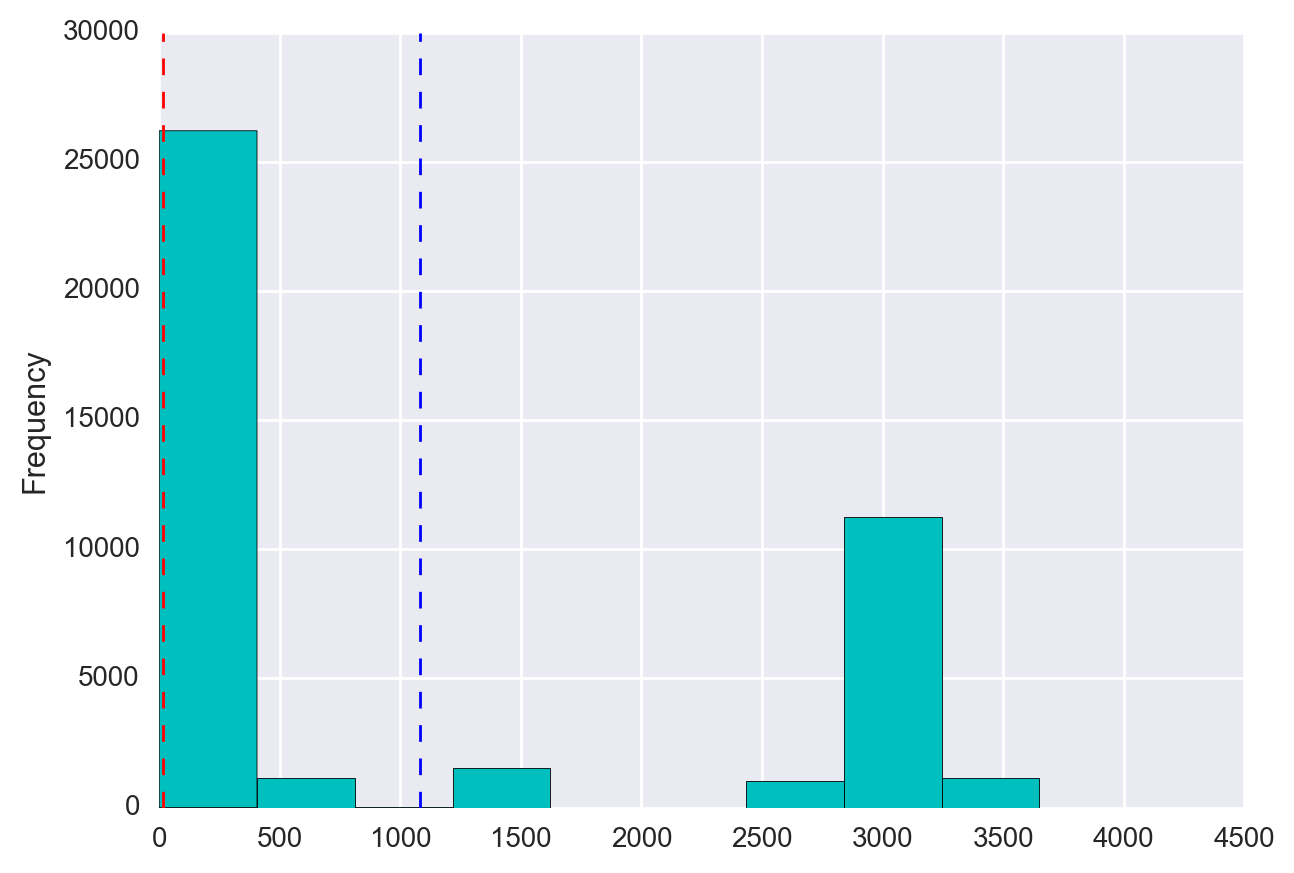

In [8]:
#Distribution of data with mean (blue) and median (red)
plt.figure(figsize = (7, 5))
tweets.TweetRetweetCount.plot(kind='hist', color='c', bins=10)
plt.axvline(tweets.TweetRetweetCount.median(), color='r', linestyle='dashed', linewidth=1)
plt.axvline(tweets.TweetRetweetCount.mean(), color='b', linestyle='dashed', linewidth=1)
plt.show()

We observe:

* mean 1081, stdev 1432, mode 14 - data is quite spread
* bimodal histogram - two peaks: around 0 and around 3000 which can indicate most tweets are not retweeted but these that are have tendency of going viral

#### Tweet posted time

All tweets in the df are from the same day, just hour of posting differs. Let's extract the hour of tweets and see how the posting times are distributed.

In [9]:
#Extracting the hour
tweets["PostHour"] = tweets.TweetPostedTime.str[11:13].astype(int)

#TweetPostedTime won't be needed anymore, let's add it to drop_list:
drop_list = ["TweetPostedTime"]

tweets["PostHour"].head()

0    10
1    10
2    10
3    10
4    10
Name: PostHour, dtype: int64

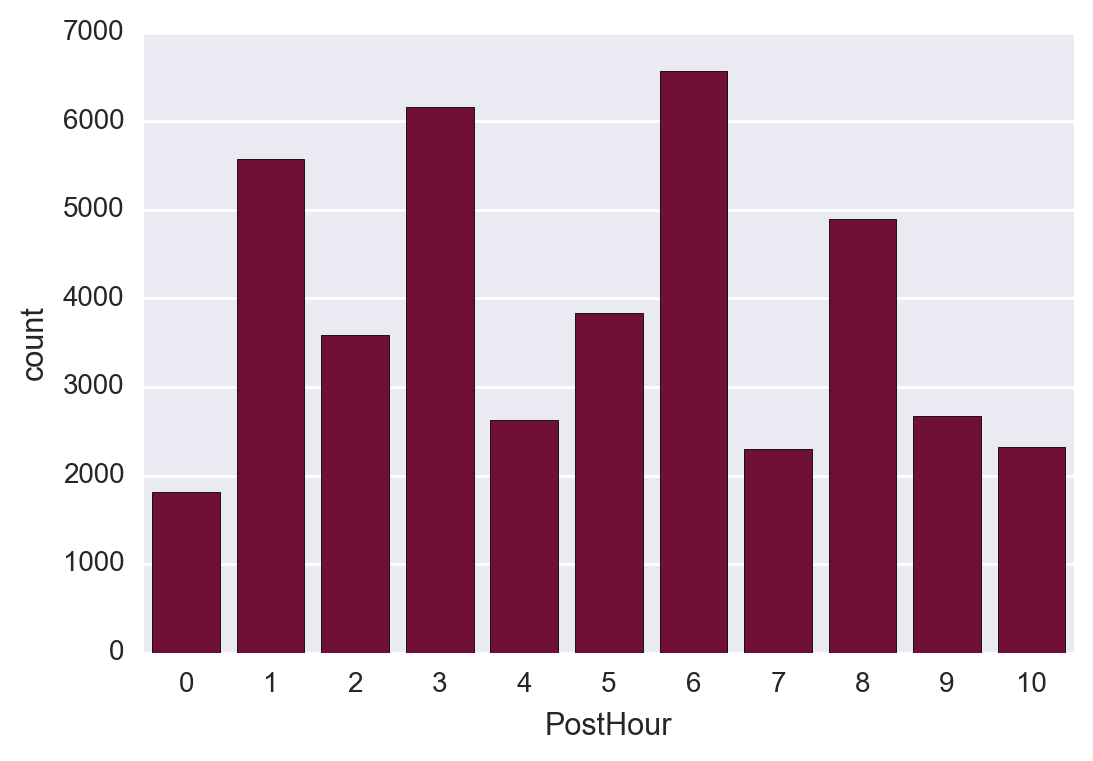

In [10]:
#Let's look at distribution using countplot as data is categorical
plt.figure(figsize = (6, 4))
sns.countplot(x="PostHour", data=tweets, color= '#800033')
plt.show()

Not much of a pattern here but we can see that some hours have more posts than others, perhaps it would have some predictive value.

#### Tweet ID

Numerical but not meaningful for our predicition - drop.

In [11]:
drop_list.append("TweetID")

#### TweetBody 
I don't have enough time to do full on text analysis but I can extract most common words from the body and try to use their presence (or absence) as the predictor.

In [12]:
# Find most common words in TweetBody column
cnt_vect = CountVectorizer(binary=True, stop_words='english', max_features=5)
D = cnt_vect.fit(tweets.TweetBody)
common_words = D.vocabulary_.keys()
print 'Most popular words in TweetBody column:', common_words

Most popular words in TweetBody column: [u'travel', u'stylishrentals', u'rt', u'beach', u'https']


In [13]:
#Presence of 'https' ie link in the tweet can have influence on retweeting value. 
#Let's create new column that would have binary values for presence of link in tweet body:

tweets['LinkInBody'] = tweets.TweetBody.map(lambda x: 1 if 'https' in x else 0)

In [14]:
#Rt and https are not keywords per se, let's remove them from the list:
common_words.remove('rt')
common_words.remove('https')
common_words

[u'travel', u'stylishrentals', u'beach']

In [15]:
#Function to check if keywords are in tweet body
def check_if_in_col(column_text):
    for item in common_words:
        if item in column_text:
            return 1
        else:
            return 0

# Create new column with binary values indicating presence of popular words in body
tweets["PopularWordsBody"] = tweets['TweetBody'].map(check_if_in_col)

In [16]:
tweets["PopularWordsBody"].head()

0    1
1    0
2    1
3    0
4    0
Name: PopularWordsBody, dtype: int64

In [17]:
#Drop TweetBody - we won't need it anymore
drop_list.append("TweetBody")

#### Next columns:

* TweetRetweetFlag - boolean for whether tweet was retweeted or not. Gives similar information as our target - risk of collinearity - drop
* TweetSource - all retwitted tweets have Twitter as a source - not much info here - drop
* TweetInReplyToStatusID - too many nans - drop
* TweetInReplyToUserID - too many nans - drop
* TweetInReplyToScreenName - too many nans - drop


In [18]:
drop_list.extend(["TweetRetweetFlag", "TweetSource", "TweetInReplyToStatusID", "TweetInReplyToUserID",
                "TweetInReplyToScreenName"])

#### TweetFavoritesCount
Looks like a potentially good predictor. Let's see:

In [19]:
tweets.TweetFavoritesCount.describe()

count   42368.00
mean        0.81
std        37.21
min         0.00
25%         0.00
50%         0.00
75%         0.00
max      2813.00
Name: TweetFavoritesCount, dtype: float64

The above indicates that huge majority of tweets has 0 favourtites. Let's see closer:

In [20]:
tweets.TweetFavoritesCount.value_counts().head(10)

0    38208
1     2487
2      765
3      345
4      154
5       89
6       50
7       35
8       25
9       22
Name: TweetFavoritesCount, dtype: int64

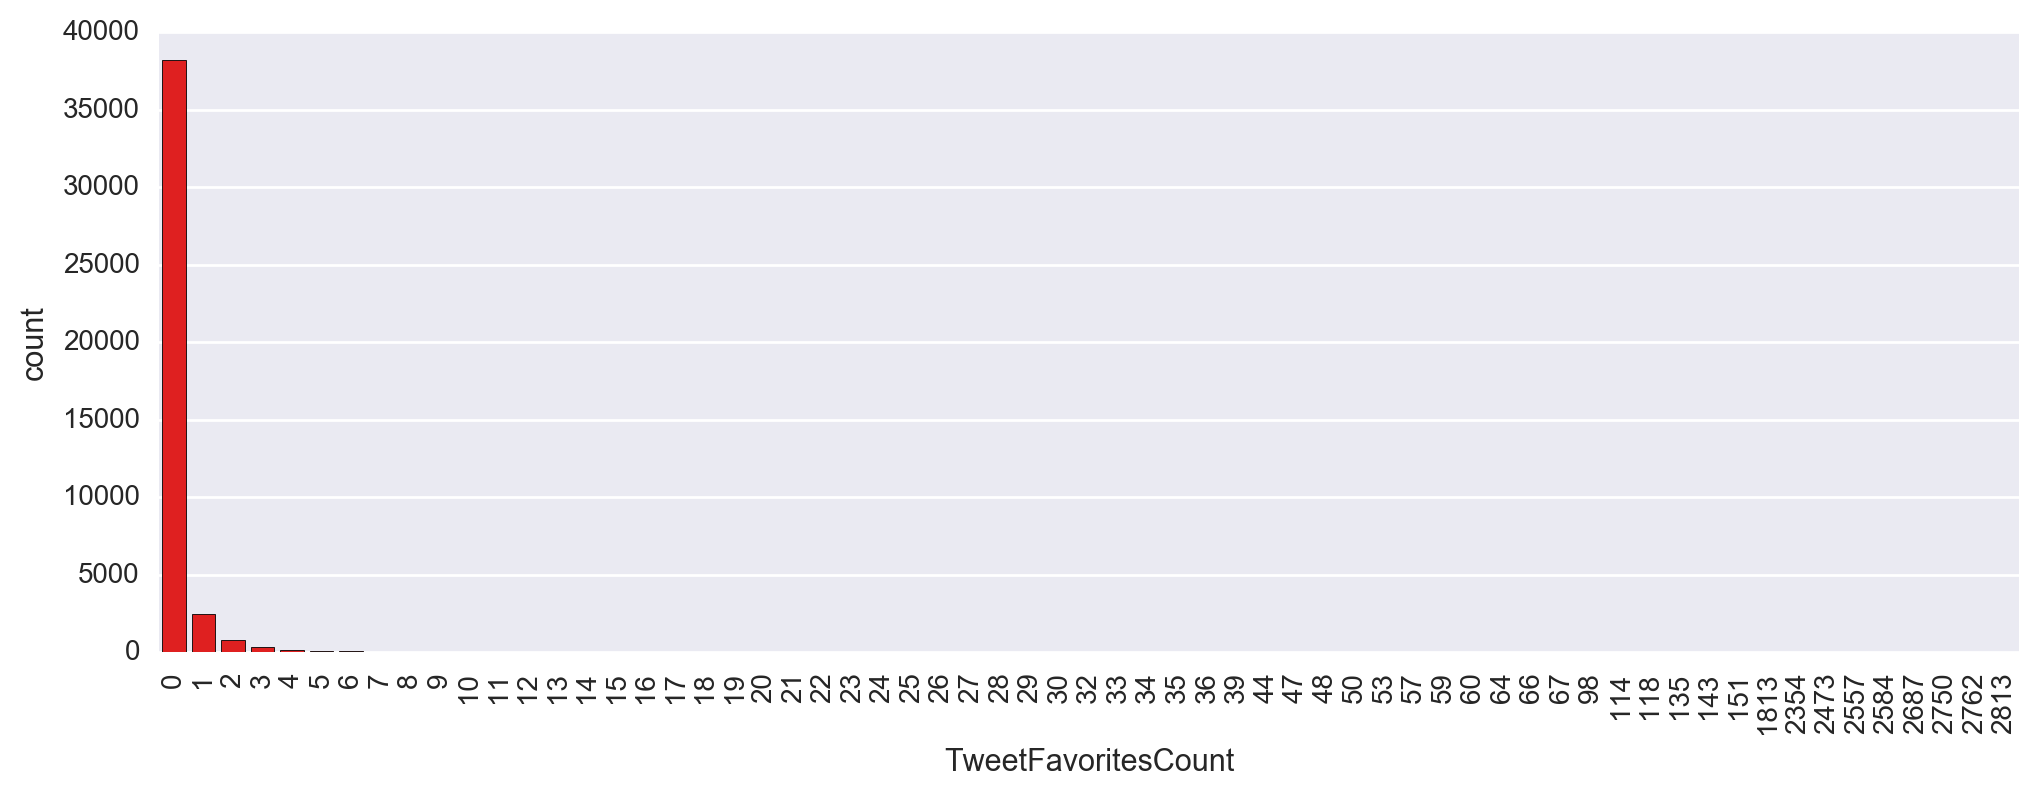

In [21]:
plt.figure(figsize = (12, 4))
sns.countplot(x="TweetFavoritesCount", data=tweets, color= 'r')
plt.xticks(rotation=90)
plt.show()

Yes, that seems to be the case. Still maybe it will help us in our predicition. Let's keep it.

#### Tweet Hashtags

Let's do the same thing as in Body ie find popular hastags, but first there are some nan values to deal with:

In [22]:
#Checking for NaNs
tweets.TweetHashtags.isnull().value_counts()

False    42268
True       100
Name: TweetHashtags, dtype: int64

In [23]:
#There is not so many tweets without hashtags. I will replace nans with string 'none'
tweets.TweetHashtags.fillna('none', inplace=True)

In [24]:
#Getting common words
H = cnt_vect.fit(tweets.TweetHashtags)
common_words = H.vocabulary_.keys()
print 'Most popular words in TweetHastags column:', common_words

Most popular words in TweetHastags column: [u'travel', u'israel', u'travelblogger', u'jerusalem', u'holiday']


In [25]:
#Adding as a new colums
tweets["PopularWordsHashtag"] = tweets['TweetHashtags'].map(check_if_in_col)
tweets["PopularWordsHashtag"].head()

0    1
1    0
2    1
3    0
4    0
Name: PopularWordsHashtag, dtype: int64

In [26]:
#Hashtag column won't be needed anymore
drop_list.append("TweetHashtags")

#### Next columns:

* TweetPlaceID                 1000 non-null object - Too much missing data - drop
* TweetPlaceName               1000 non-null object - Too much missing data - drop
* TweetPlaceFullName           1000 non-null object - Too much missing data - drop
* TweetCountry                 999 non-null object - Too much missing data - drop
* TweetPlaceBoundingBox        1000 non-null object - Too much missing data - drop
* TweetPlaceAttributes         0 non-null float64 - No data - drop
* TweetPlaceContainedWithin    0 non-null float64 - No data - drop
* UserID                       42368 non-null int64 - No predictive value - drop



In [27]:
drop_list.extend(["TweetPlaceID", "TweetPlaceName", "TweetPlaceFullName", "TweetCountry",
                "TweetPlaceBoundingBox", "TweetPlaceAttributes", "TweetPlaceContainedWithin", "UserID"])

#### UserName

In [28]:
tweets.UserName.head(10)

0         CjQenterprises
1                 monica
2           Paula Schuck
3       Primal Sanctuary
4                    Joe
5                    Rey
6    The Quirky wanderer
7         Hayley Preston
8         ibrahim keklik
9          Whiskey About
Name: UserName, dtype: object

In [29]:
#I dont think these are meaningful -  drop 
drop_list.append("UserName")

#### UserScreenName

In [30]:
tweets.UserScreenName.head(10)

0     CjQenterprises
1           mama0004
2          inkscrblr
3    primalsanctuary
4    biryukovasever2
5     GerasimovArvid
6         DivsiGupta
7    guramponomarev5
8           gnkeklik
9     whiskeyaboutlb
Name: UserScreenName, dtype: object

In [31]:
#As above - drop
drop_list.append("UserScreenName")

#### User location
1/3 data is missing. too much for meaningful imputation - drop

In [32]:
drop_list.append("UserLocation")

#### UserDescription
Let's do common words here too, but first we must deal with NaNs.

In [33]:
tweets.UserDescription.isnull().value_counts()

False    38004
True      4364
Name: UserDescription, dtype: int64

In [34]:
#Filling with 'none'
tweets.UserDescription.fillna('none', inplace=True)

In [35]:
#Getting common words
U = cnt_vect.fit(tweets.UserDescription)
common_words = U.vocabulary_.keys()
print 'Most popular words in UserDescription column:', common_words

Most popular words in UserDescription column: [u'travel', u'world', u'life', u'love', u'https']


In [36]:
#Adding new column with common words
tweets["PopularWordsDescr"] = tweets['UserDescription'].map(check_if_in_col)
tweets["PopularWordsDescr"].head()

0    0
1    0
2    0
3    1
4    0
Name: PopularWordsDescr, dtype: int64

In [37]:
#We won't need the user description column anymore
drop_list.append("UserDescription")

#### Next columns:

* UserLink                     16599 non-null object -  Too much missing data - drop
* UserExpandedLink             16562 non-null object -  Too much missing data - drop

In [38]:
drop_list.append("UserLink")
drop_list.append("UserExpandedLink")

#### Next columns:

* UserFollowersCount           42368 non-null int64
* UserFriendsCount             42368 non-null int64
* UserListedCount              42368 non-null int64
* UserTweetCount               42368 non-null int64

Numerical columns and perhaps good predictors? Lets look closer:

#### UserFollowersCount

In [39]:
tweets.UserFollowersCount.value_counts().head(10)

0    657
5    551
6    522
4    516
7    509
3    492
1    459
8    449
2    439
9    423
Name: UserFollowersCount, dtype: int64

In [40]:
tweets.UserFollowersCount.describe()

count     42368.00
mean       6197.00
std       56200.06
min           0.00
25%          40.00
50%         149.00
75%        1819.25
max     4572706.00
Name: UserFollowersCount, dtype: float64

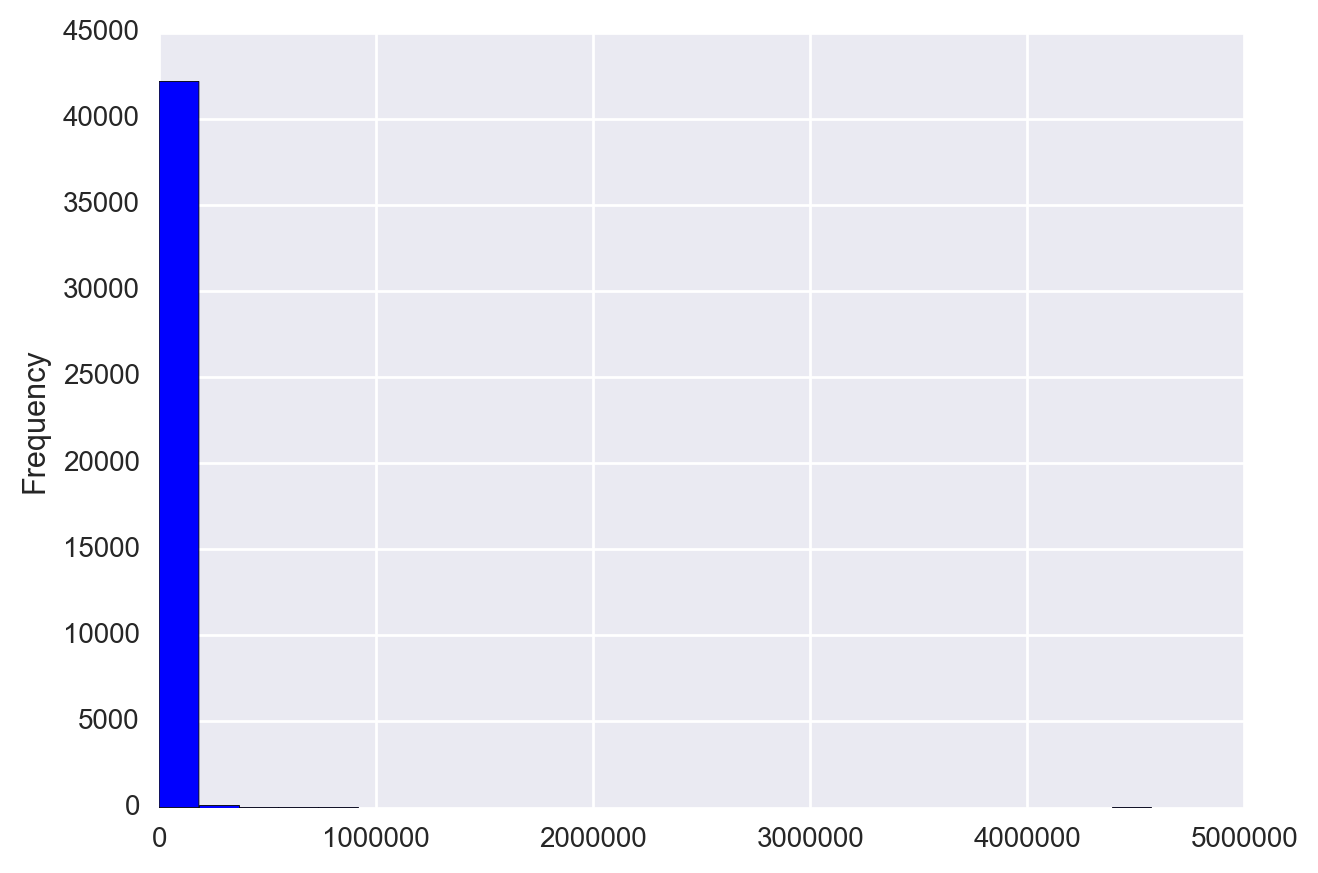

In [41]:
plt.figure(figsize = (7, 5))
tweets.UserFollowersCount.plot(kind='hist', color='b', bins=25)
plt.show()

In [42]:
#Huge stdev perhaps influenced by the large max value? Let's sort the values and see:
tweets.UserFollowersCount.sort_values(ascending=False).head(15)

4108     4572706
1722     4572706
29717    4572671
22562    4572666
18732    4572661
36161     820455
26511     820455
31772     747595
41304     741864
27508     673414
11382     673414
6219      673414
467       673413
4636      673413
33537     623525
Name: UserFollowersCount, dtype: int64

There seem to be 5 very huge outliers. Also top numbers are the same - is it the same user?

In [43]:
print "first user:", tweets.ix[4108, "UserName"], ", second user:", tweets.ix[1722, "UserName"]

first user: Lonely Planet , second user: Lonely Planet


It is the same user indeed.

But even though they are such a big outliers, I'm inclined to leave them there. Perhaps the values will need to be  standardized the values later so it won't matter.

#### UserFriendsCount

In [44]:
tweets.UserFriendsCount.value_counts().head(10)

21    3109
0     2163
46     615
50     568
48     567
20     509
54     494
52     491
53     457
51     452
Name: UserFriendsCount, dtype: int64

In [45]:
tweets.UserFriendsCount.describe()

count    42368.00
mean      3859.35
std      19345.98
min          0.00
25%         40.00
50%        304.00
75%       1780.00
max     689302.00
Name: UserFriendsCount, dtype: float64

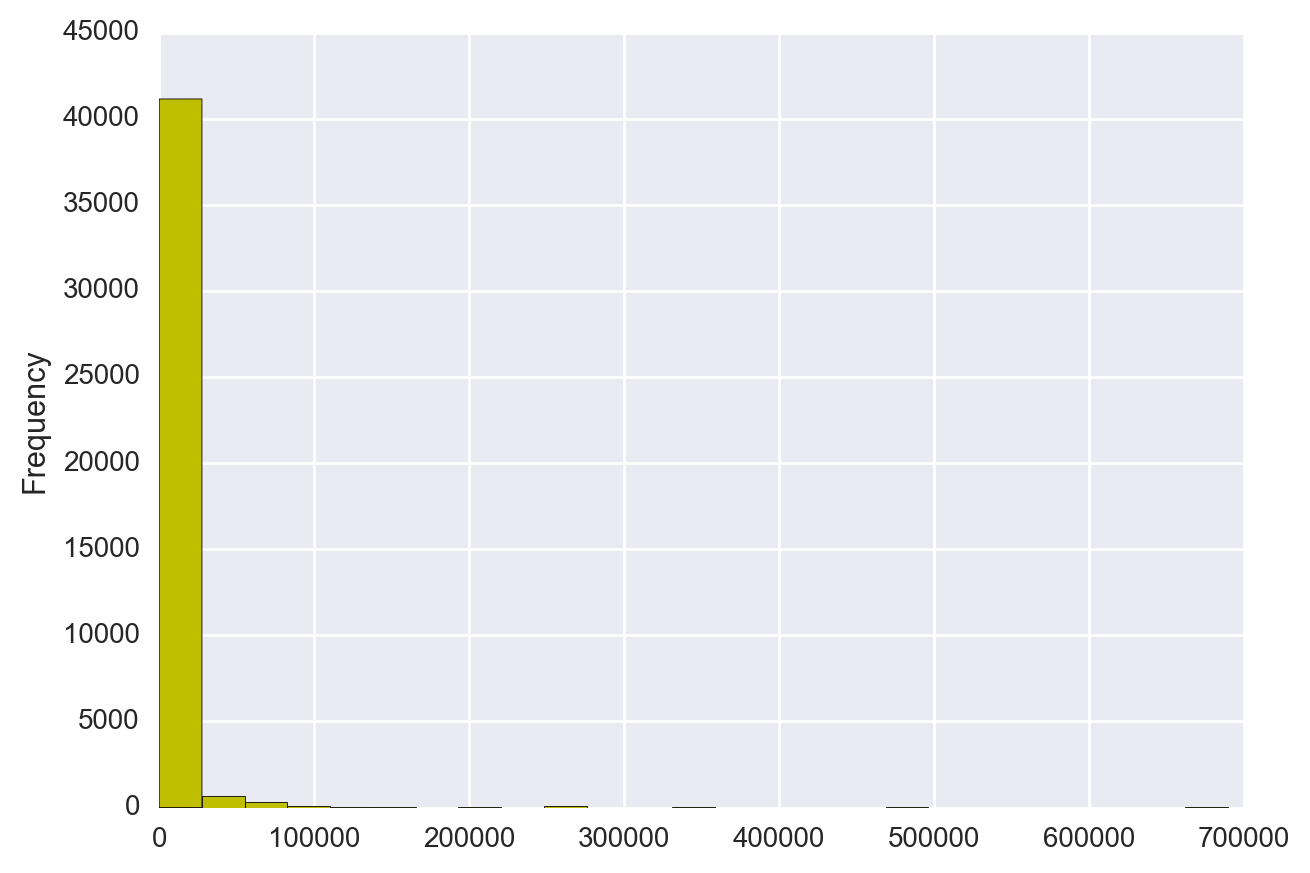

In [46]:
plt.figure(figsize = (7, 5))
tweets.UserFriendsCount.plot(kind='hist', color='y', bins=25)
plt.show()

#### UserListedCount

In [47]:
tweets.UserListedCount.value_counts().head(10)

0     1850
1      850
16     612
21     607
10     602
18     600
12     578
2      561
8      541
4      536
Name: UserListedCount, dtype: int64

In [48]:
tweets.UserListedCount.describe()

count   42368.00
mean      312.09
std       850.62
min         0.00
25%        17.00
50%        41.00
75%       217.00
max     26577.00
Name: UserListedCount, dtype: float64

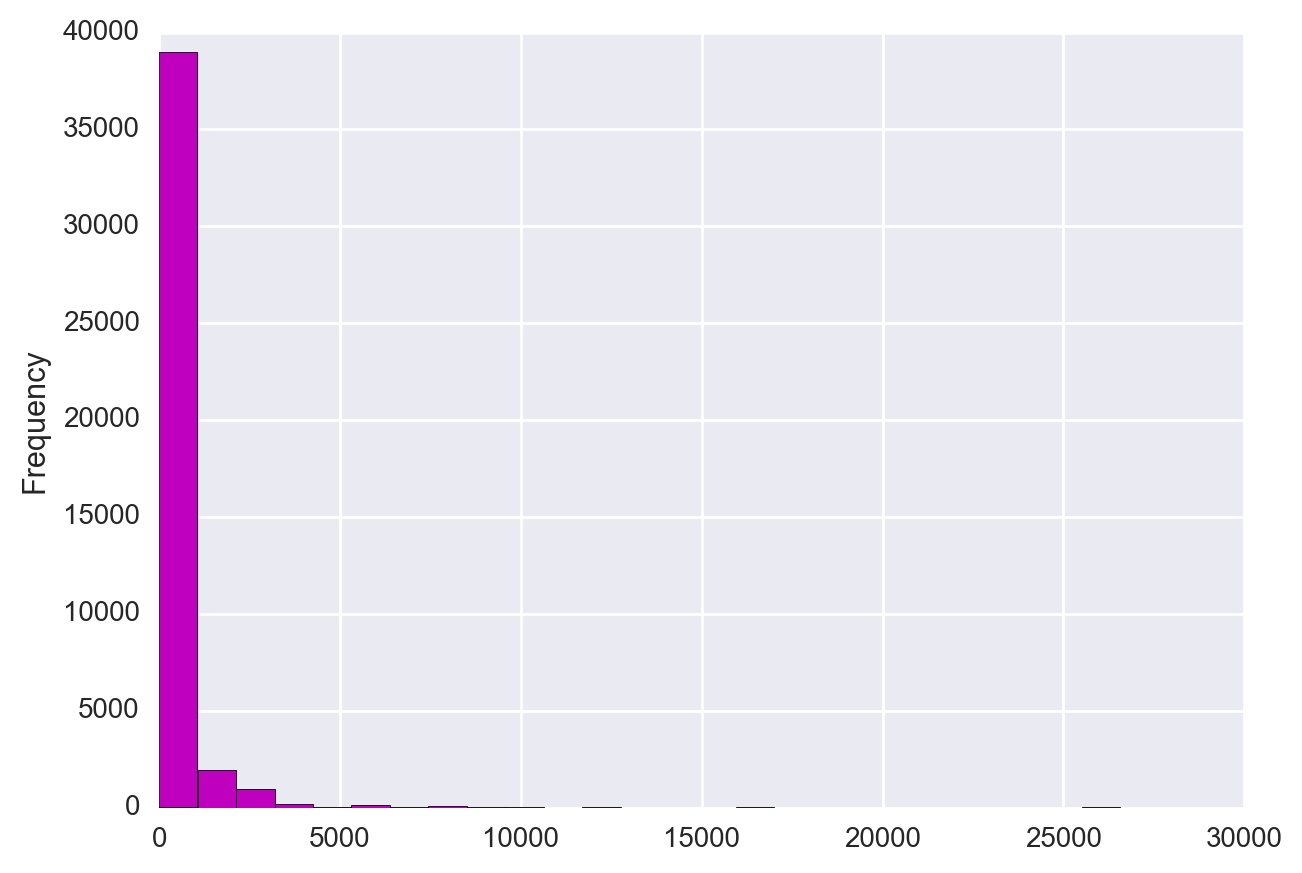

In [49]:
plt.figure(figsize = (7, 5))
tweets.UserListedCount.plot(kind='hist', color='m', bins=25)
plt.show()

#### UserTweetCount

In [50]:
tweets.UserTweetCount.value_counts().head(10)

12202     166
150103    130
116380    129
233570    119
159530    108
1715      107
86634      87
86065      73
7203       73
8          69
Name: UserTweetCount, dtype: int64

In [51]:
tweets.UserTweetCount.describe()

count     42368.00
mean      37772.49
std       90017.77
min           1.00
25%        2793.50
50%       19897.00
75%       33274.00
max     2064424.00
Name: UserTweetCount, dtype: float64

Again, large standard deviation, but could be a useful predictor.

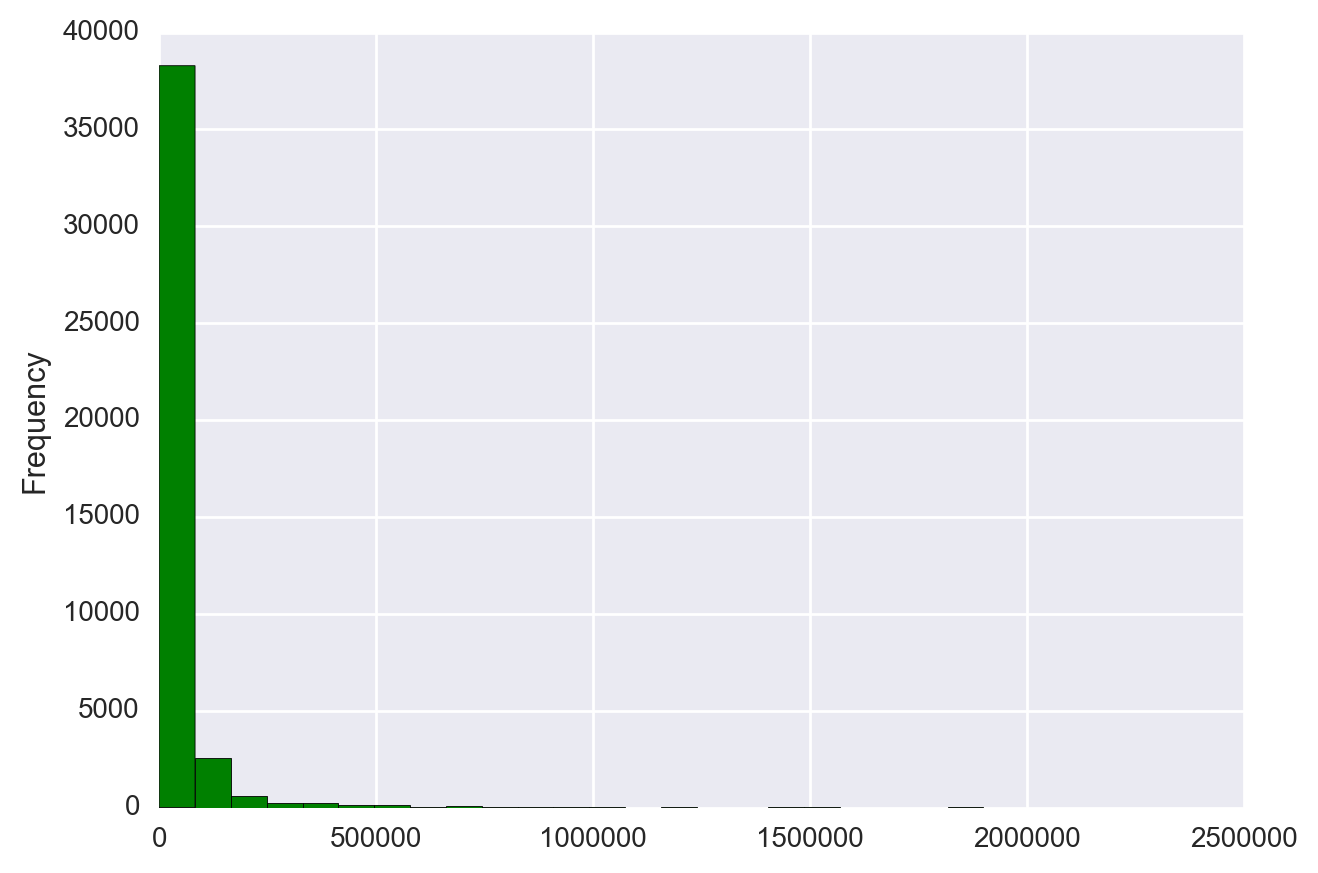

In [52]:
plt.figure(figsize = (7, 5))
tweets.UserTweetCount.plot(kind='hist', color='g', bins=25)
plt.show()

#### UserSignupDate

This could be a potentially good predictor - perhaps the users that are longer on the platform would have more followers and more retweet potential?

In [53]:
tweets.UserSignupDate.head(10)

0    Sun Jun 14 22:36:15 +0000 2015
1    Sat Jan 02 13:36:23 +0000 2010
2    Tue May 26 21:26:09 +0000 2009
3    Sat Sep 12 20:29:18 +0000 2015
4    Wed Sep 07 16:22:15 +0000 2016
5    Thu Sep 08 05:39:37 +0000 2016
6    Wed Jun 22 05:26:07 +0000 2011
7    Wed Aug 17 13:39:14 +0000 2016
8    Wed Jan 11 11:12:20 +0000 2012
9    Wed Oct 02 21:15:56 +0000 2013
Name: UserSignupDate, dtype: object

Let's extract the year and create a new column:

In [54]:
tweets["SignupYear"] = tweets.UserSignupDate.str[-4:].astype(int)

#UserSignupDate won't be needed anymore, let's add it to drop_list:
drop_list.append("UserSignupDate")

tweets["SignupYear"].head()

0    2015
1    2010
2    2009
3    2015
4    2016
Name: SignupYear, dtype: int64

In [55]:
#How many unique years there is?
tweets.SignupYear.unique()

array([2015, 2010, 2009, 2016, 2011, 2012, 2013, 2014, 2008, 2007, 2006])

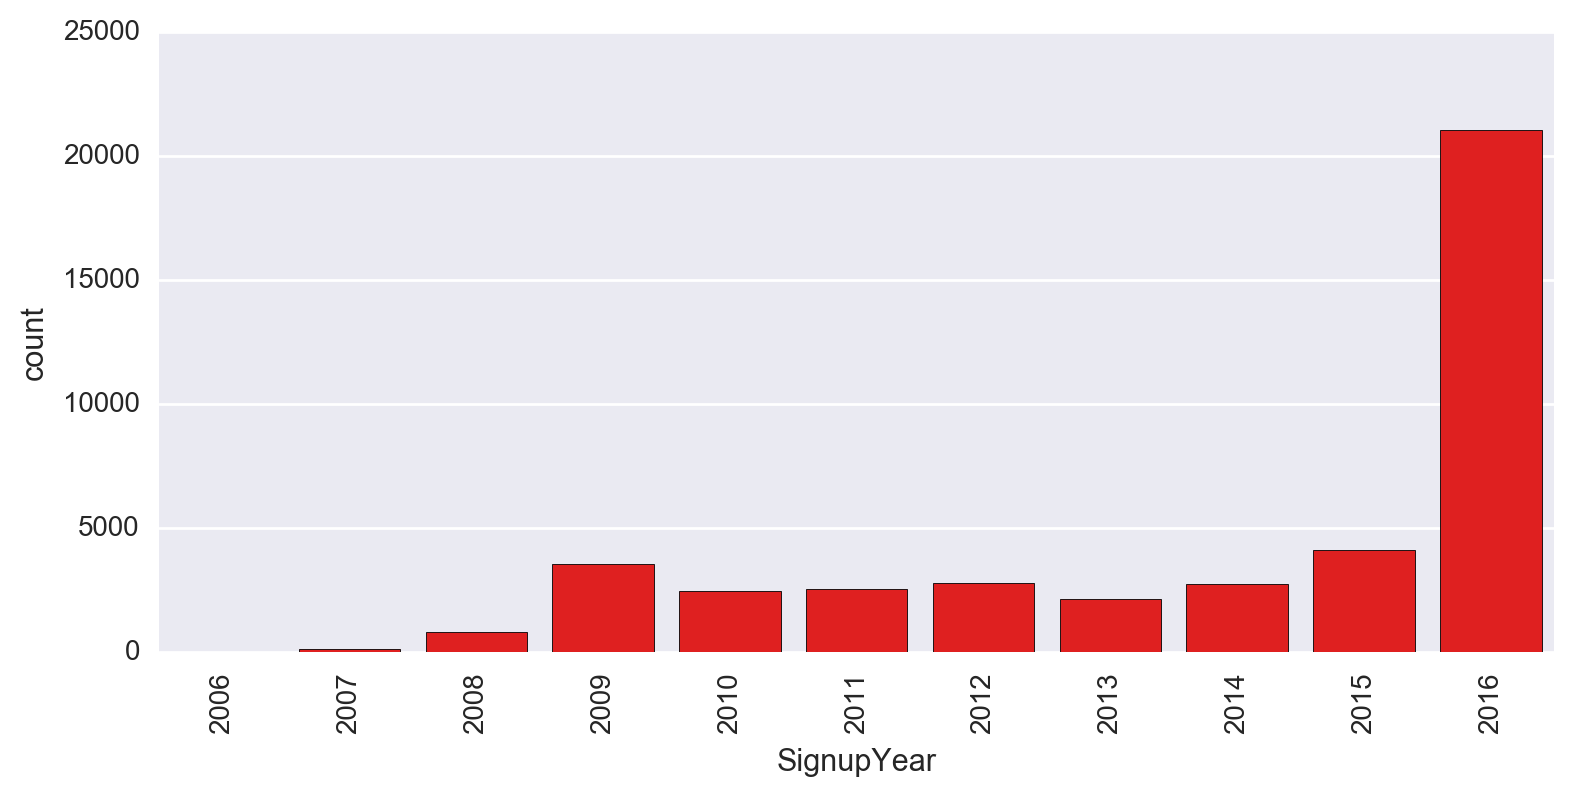

In [56]:
#How the distribution looks like?
plt.figure(figsize = (9, 4))
sns.countplot(x="SignupYear", data=tweets, color= 'r')
plt.xticks(rotation=90)
plt.show()

Huge majority of signups were in 2016. 

#### Next columns:

* MacroIterationNumber         42368 non-null int64 - not meaningful - drop
* tweet.place                  1000 non-null object - too many NaNs - drop

In [57]:
drop_list.append("MacroIterationNumber")
drop_list.append("tweet.place")

#### Removing unecessary columns:

In [58]:
tweets.drop(drop_list, axis =1, inplace=True)

#### Dataframe prepared for modeling phase

In [59]:
tweets.head()

,TweetRetweetCount,TweetFavoritesCount,UserFollowersCount,UserFriendsCount,UserListedCount,UserTweetCount,PostHour,LinkInBody,PopularWordsBody,PopularWordsHashtag,PopularWordsDescr,SignupYear
0,1,0,6334,6144,1917,33556,10,1,1,1,0,2015
1,1,0,154,371,180,3201,10,1,0,0,0,2010
2,0,0,23433,24762,961,147958,10,1,1,1,0,2009
3,1,0,11136,10081,978,28988,10,1,0,0,1,2015
4,3065,0,55,21,31,19581,10,1,0,0,0,2016


#### Visualise relationships between features

Correlation matrix

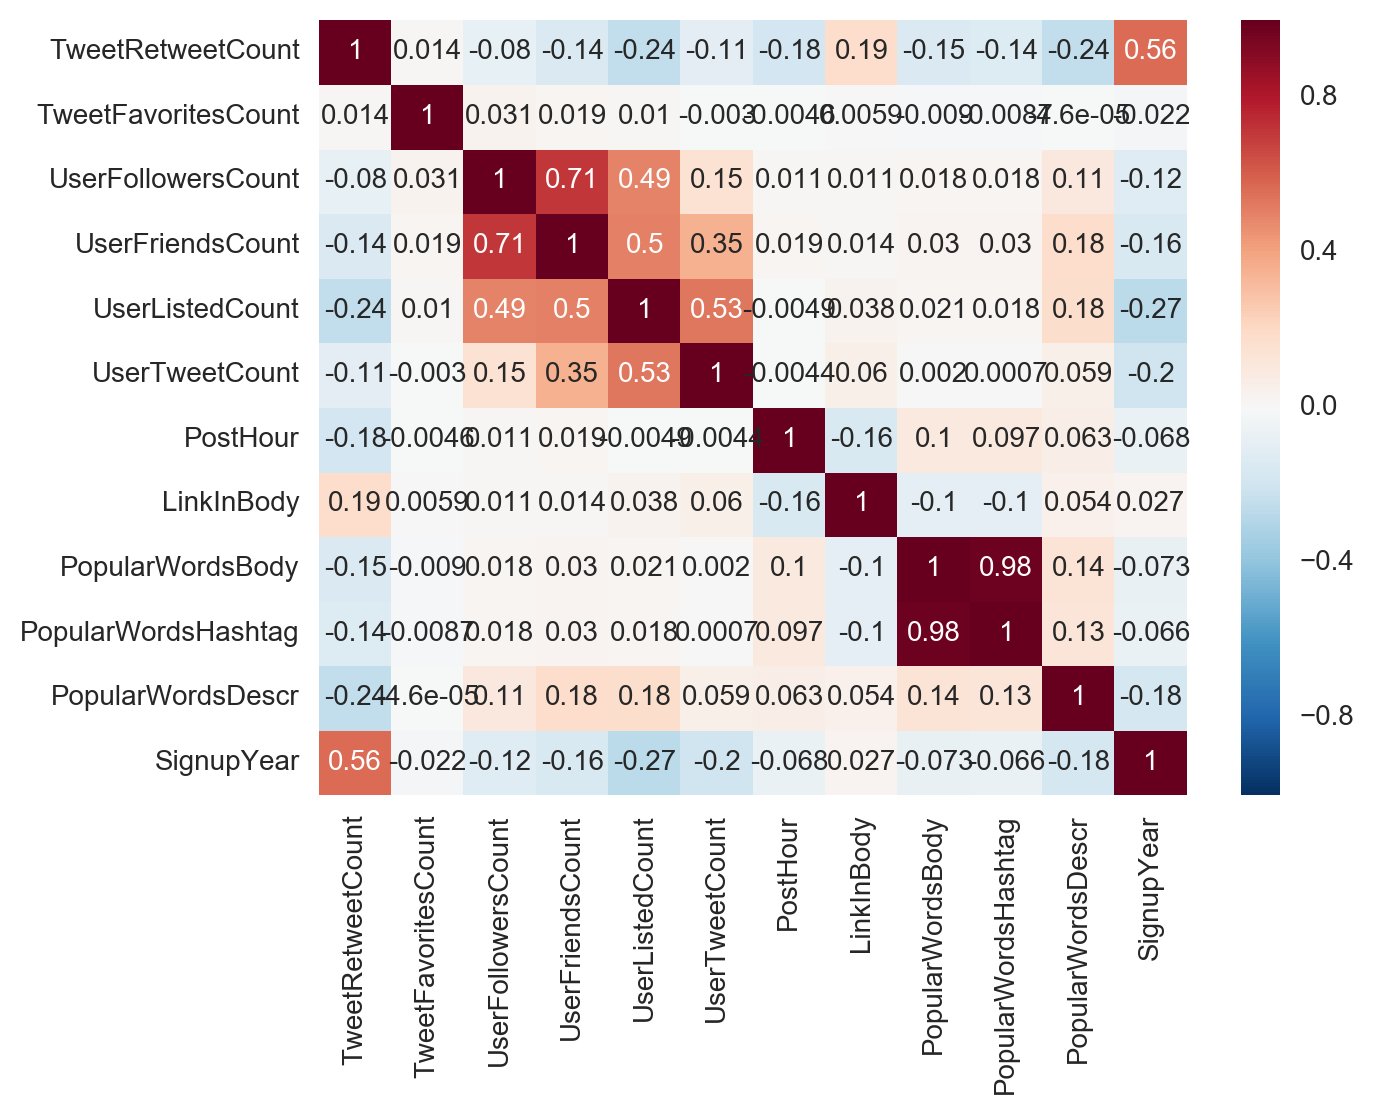

In [60]:
plt.figure(figsize = (7, 5))
sns.heatmap(tweets.corr(), annot = tweets.corr())
plt.show()

The correlation matrix doesn't look optimistic when it comes to prediciton - the association between the number of retweets and other features is rather weak. However some of ther features ar categorical so heatmap might be not very accurate here. Let's look at a pairplot now.

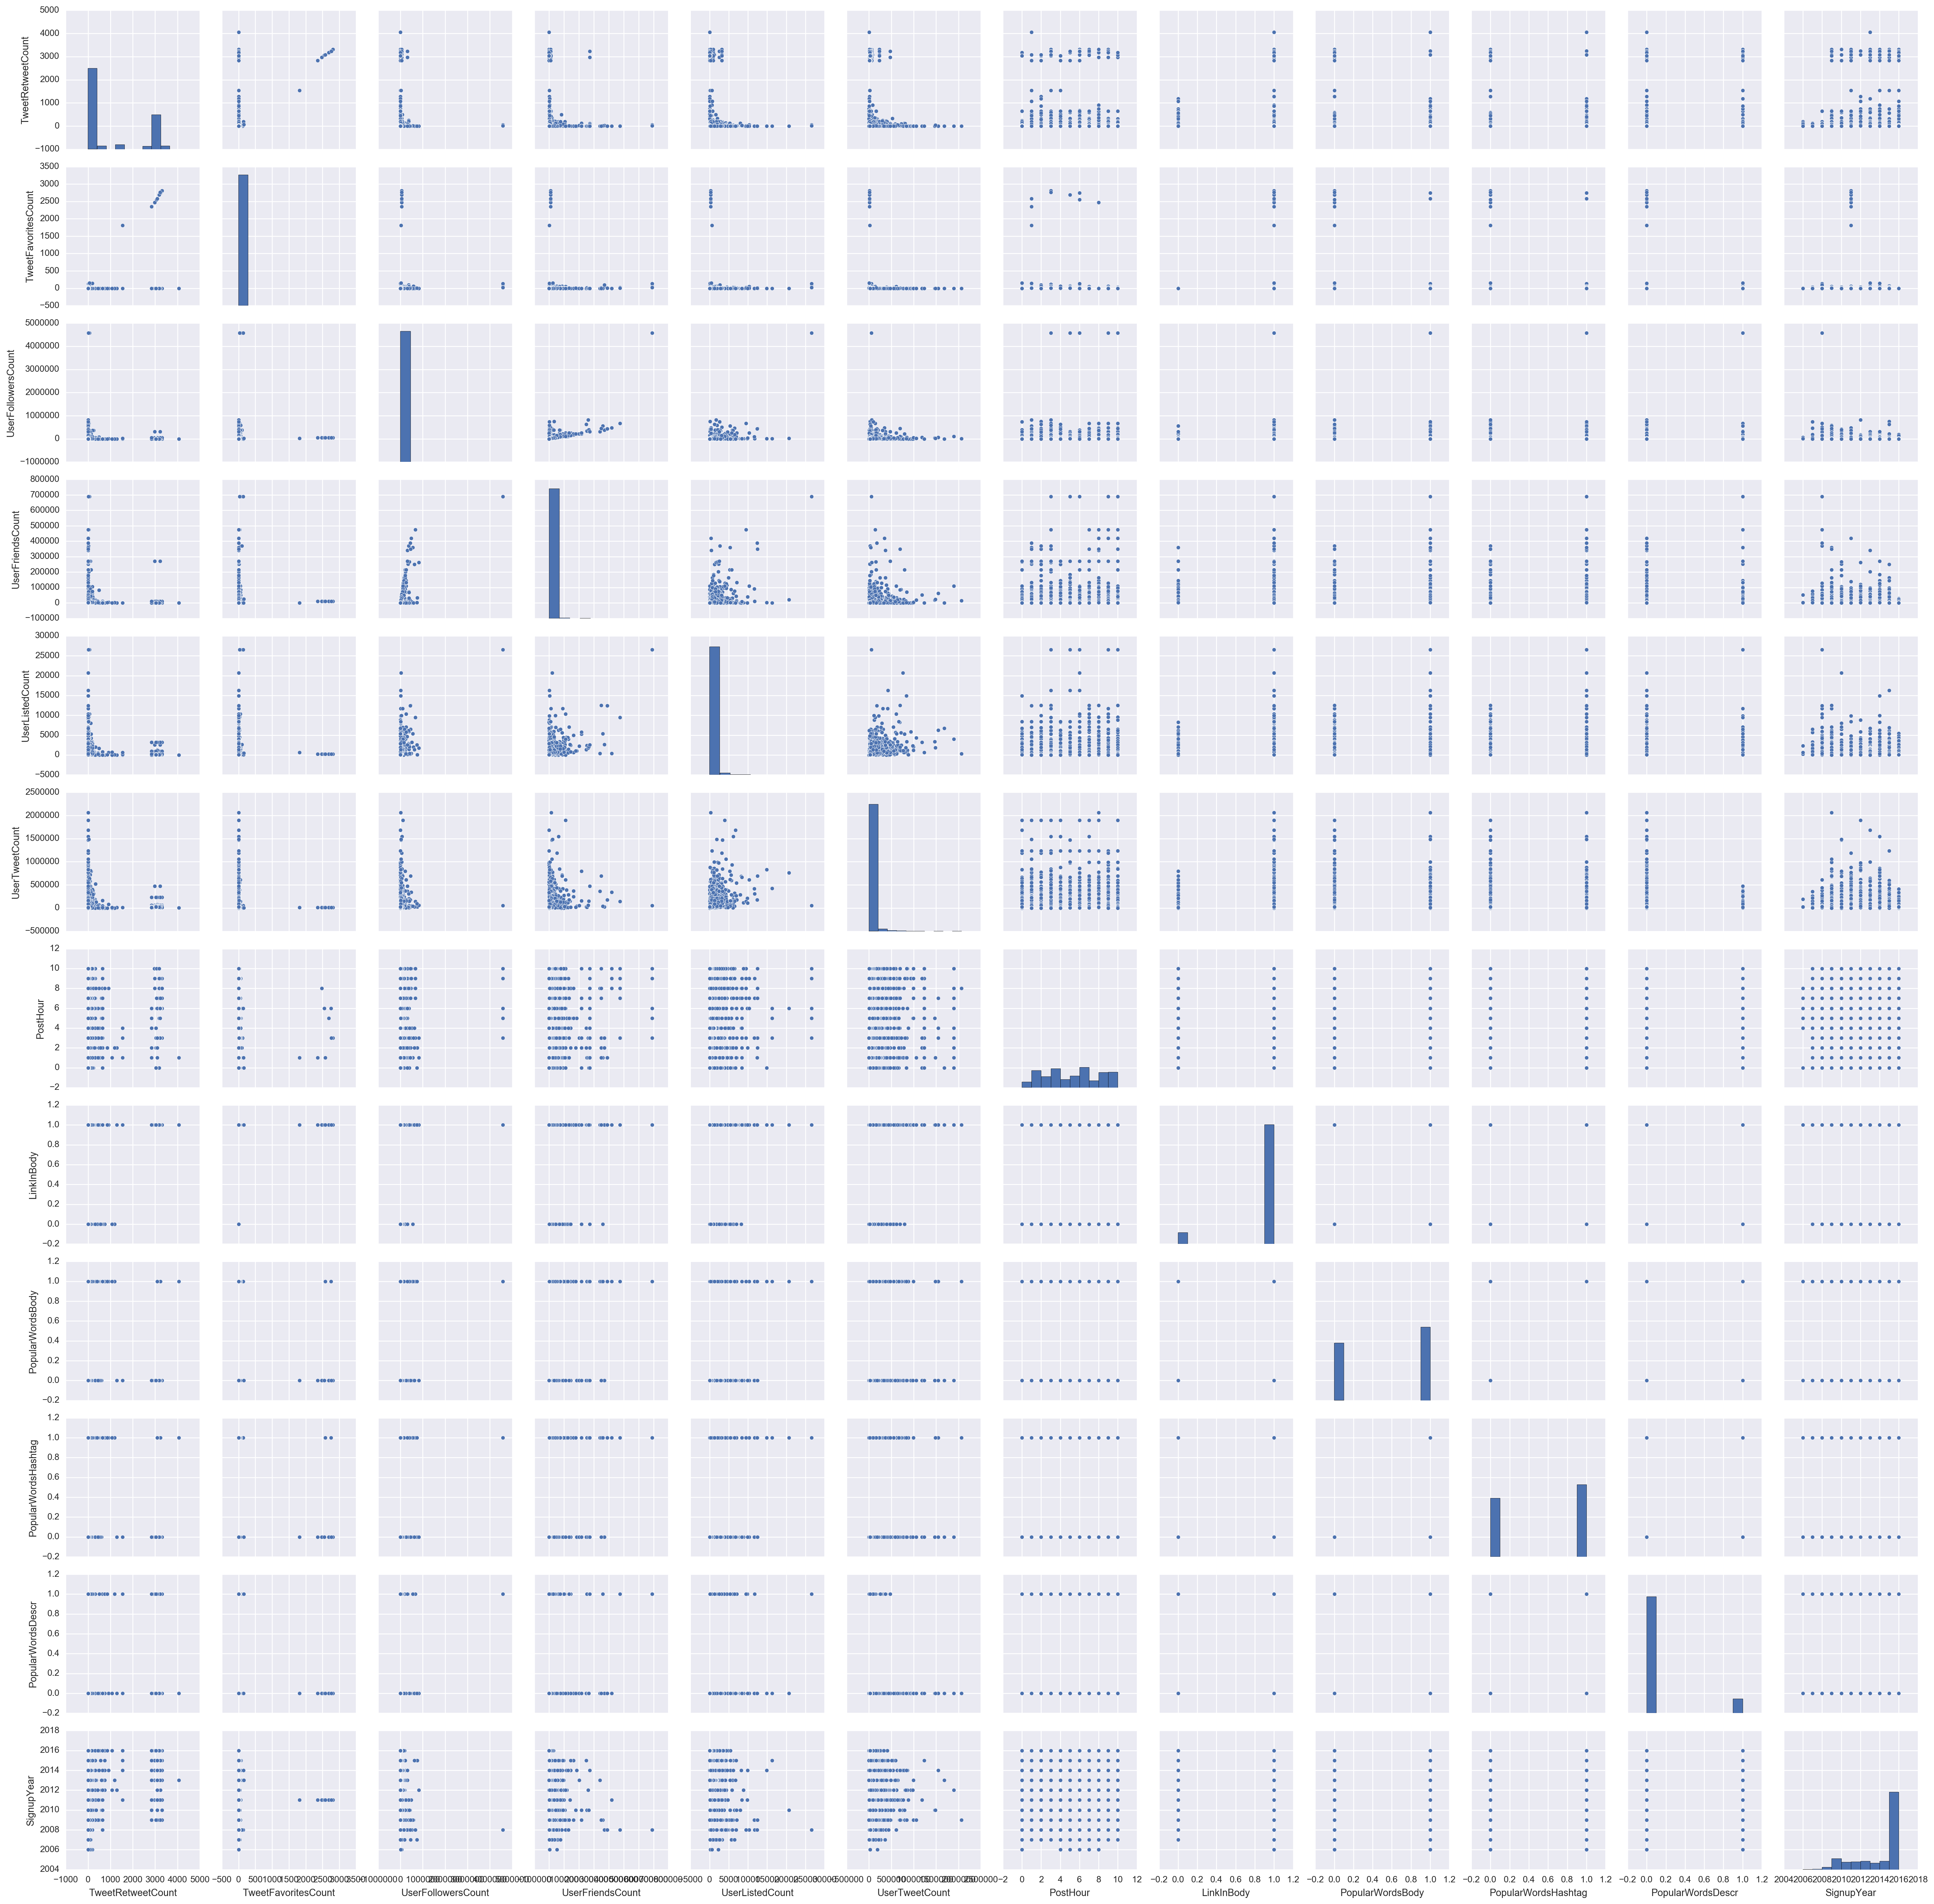

In [61]:
sns.pairplot(tweets)
plt.show()

Not very much of a linear relationship between the features and target. Let's build a model anyway and see wheter we can predict anything at all.

### MODELLING

In [62]:
#Getting column names
col_names = tweets.columns.tolist()
print col_names

[u'TweetRetweetCount', u'TweetFavoritesCount', u'UserFollowersCount', u'UserFriendsCount', u'UserListedCount', u'UserTweetCount', 'PostHour', 'LinkInBody', 'PopularWordsBody', 'PopularWordsHashtag', 'PopularWordsDescr', 'SignupYear']


In [63]:
#Creating design matrix:

formula = '~ TweetFavoritesCount + UserFollowersCount + UserFriendsCount +UserListedCount + UserTweetCount + C(PostHour) + LinkInBody + PopularWordsBody + PopularWordsHashtag + PopularWordsDescr +C(SignupYear) -1'

X = patsy.dmatrix(formula, data=tweets, return_type='dataframe')
y = tweets.TweetRetweetCount.values

print X.shape
print y.shape

(42368, 30)
(42368,)


In [64]:
#Creating test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [65]:
#Fitting Linear Regression

lm = LinearRegression()
model = lm.fit(X_train, y_train)

#Getting values of R2 using 5-fold cross-validation

print "Mean Train Score:", cross_val_score(lm,X_train,y_train,cv=5).mean() 
print "Test Score:", lm.score(X_test, y_test)

Mean Train Score: 0.576583904595
Test Score: 0.574065170092


This is not a mind-blowing result. It means that only 57% of the variation in our target is explained by the model.

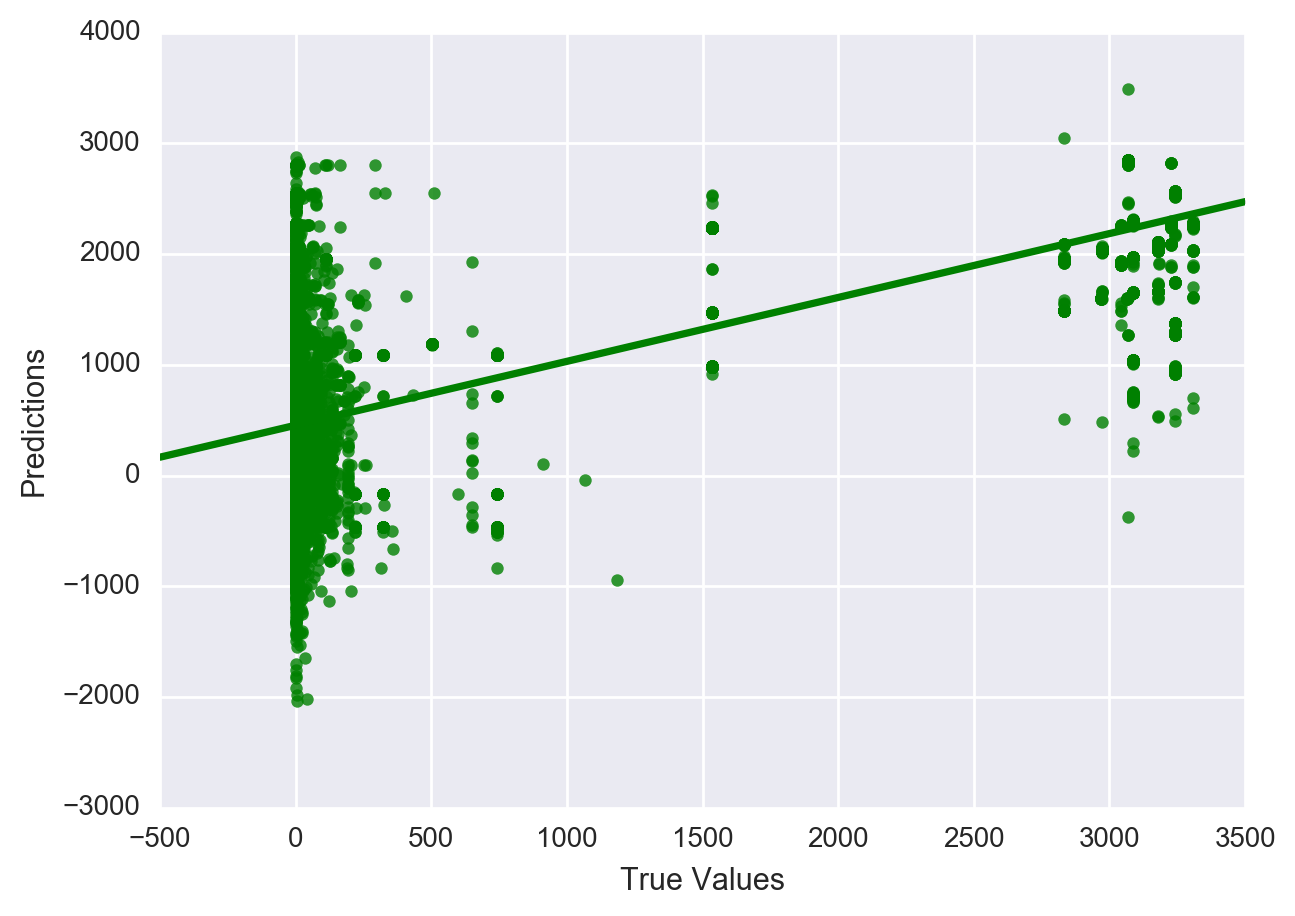

In [66]:
#Getting predictions
predictions = lm.predict(X_test)

#Plotting regression:
plt.figure(figsize = (7, 5))
sns.regplot(y_test, predictions, color='g')
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.show()

In [67]:
#Calculating mean squared error
mod_test_mse = mean_squared_error(y_test, predictions)
base_test_mse = mean_squared_error(y_test, np.tile(np.mean(y_test), len(y_test)))

print 'Model test MSE:', mod_test_mse
print 'Baseline test MSE:', base_test_mse

Model test MSE: 869137.210842
Baseline test MSE: 2040540.35926


Very large MSE for this model, but way smaller than the baseline. So the model works. Just doesn't work very well.

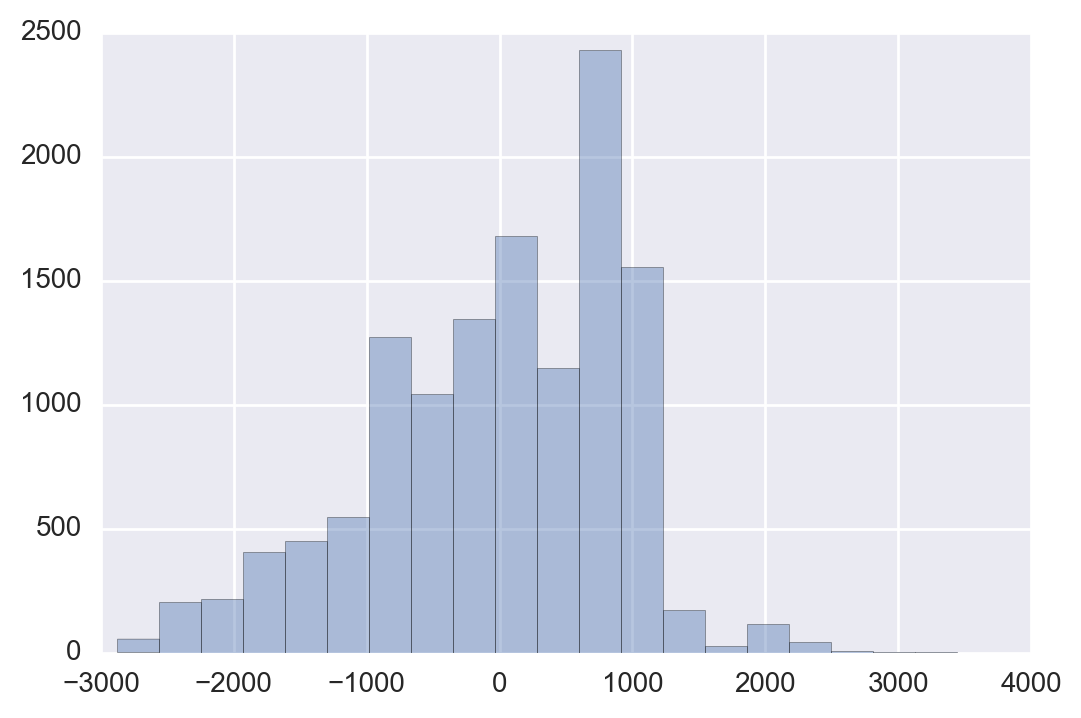

In [68]:
#Plot test residuals histogram
test_resid = y_test - predictions
sns.distplot(test_resid, bins=20, hist=True, kde=False)
plt.show()

In [69]:
#Getting feature importances

coefs = pd.DataFrame({'variable':X.columns,
                            'coef':lm.coef_,
                            'abs_coef':np.abs(lm.coef_)})

coefs.sort_values('abs_coef', inplace=True, ascending=False)

coefs

,abs_coef,coef,variable
20,1683.44,1683.44,C(SignupYear)[T.2016]
6,826.24,826.24,C(PostHour)[6]
27,660.07,-660.07,PopularWordsBody
26,637.43,637.43,LinkInBody
1,568.95,568.95,C(PostHour)[1]
4,508.58,-508.58,C(PostHour)[4]
19,429.15,429.15,C(SignupYear)[T.2015]
10,399.76,-399.76,C(PostHour)[10]
7,389.36,-389.36,C(PostHour)[7]
29,375.94,-375.94,PopularWordsDescr


Funnily enough, the continuouous numerical variables came on the the bottom, while the ones engineered by us seem to have the highest association with the time. If I had more time I'd run another model with continuous variables only to see how it would perform.

#### References

##### Code:
* I mostly used code from my own projects as reference; the link to repo: https://github.com/mags-zw/DSI-projects
* https://stackoverflow.com/questions/40347689/dataframe-describe-suppress-scientific-notation
* https://stackoverflow.com/questions/28775813/not-able-to-view-all-columns-in-pandas-data-frame
* https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html
* http://seaborn.pydata.org/generated/seaborn.regplot.html?highlight=regplot#seaborn.regplot

##### Non-code:

* https://www.quora.com/Whats-the-difference-between-a-friend-and-a-follower-on-Twitter
* http://www.wikinomics.com/blog/index.php/2009/11/23/twitter-popularity-follower-vs-list-counts/
* https://community.alteryx.com/t5/Data-Preparation-Blending/Help-Understanding-Data-returned-from-the-Twitter-connection/td-p/17718
